## Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Get the data - features without the target

In [4]:
import os
from pathlib import Path

# Load data
path = Path(os.getcwd() + "/..").resolve()
dataset_path = path/'Datasets/Tabular/FOOD-DATA-GROUP.csv'
df = pd.read_csv(dataset_path)

df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
# Drop target as it is not needed in clustering
df = df.drop(target, axis=1)

## Yeo-Johnson transformation

In [6]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)


## Feature Selection


### Create features manually

In [9]:
# Column added for feature extraction
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']

### Top 10 selected features

In [11]:
selected_features = ['Nutrition Density', 'Monounsaturated Fats', 'Phosphorus', 'Calcium', 'Sodium', 'Vitamin B11', 'Dietary Fiber', 'Copper', 'Selenium', 'Protein+Carbohydrates+Fat']
X = df[selected_features]

## Graphical model - Silhouette method

### Implement KMeans

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate KMeans model for clusters in range 2 to 7 inclusive and a random generator seed of 42 for reproducibility.
# Silhouette score requires at least 2 clusters
kmeans_per_k = [KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X) for k in range(2, 8)]

# Calculate silhouette score for each KMeans model
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

### Plot inertia values

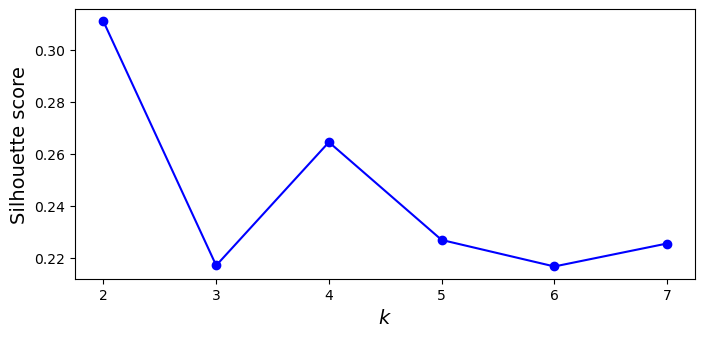

In [16]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()